In [1]:
# Navigating to the project code directory

%cd /home/teamdaedulus/automatic-raga-recognition/src

/home/teamdaedulus/automatic-raga-recognition/src


#### Importing required packages

In [2]:
import torch
# import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
torch.cuda.empty_cache()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

### Test LSTM-based model performance

#### Load Test Data

In [4]:
# load test datasets

X_test = torch.from_numpy(np.load("../data/X_test.npy")).long()
Y_test = torch.from_numpy(np.load("../data/Y_test.npy")).long()

#### Create model instance and load weights

In [5]:
from deepSRGM import DeepSRGM
model = DeepSRGM(rnn='lstm').to(device)

/opt/anaconda3/envs/pipenv/lib/python3.7/site-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [6]:
model.load_state_dict(torch.load("../models/lstm_30_checkpoint.pth"))

<All keys matched successfully>

#### Evaluate on Test Set

In [7]:
from test_utils import evaluate, evaluate_naive

In [8]:
evaluate(model, X_test, Y_test, threshold=0.6, verbose=True)

Sample 1/30 classified as CORRECT
Sample 2/30 classified as CORRECT
Sample 3/30 classified as CORRECT
Sample 4/30 classified as CORRECT
Sample 5/30 classified as CORRECT
Sample 6/30 classified as CORRECT
Sample 7/30 classified as CORRECT
Sample 8/30 classified as INCORRECT
Sample 9/30 classified as CORRECT
Sample 10/30 classified as CORRECT
Sample 11/30 classified as CORRECT
Sample 12/30 classified as CORRECT
Sample 13/30 classified as CORRECT
Sample 14/30 classified as CORRECT
Sample 15/30 classified as CORRECT
Sample 16/30 classified as CORRECT
Sample 17/30 classified as CORRECT
Sample 18/30 classified as CORRECT
Sample 19/30 classified as CORRECT
Sample 20/30 classified as CORRECT
Sample 21/30 classified as CORRECT
Sample 22/30 classified as CORRECT
Sample 23/30 classified as CORRECT
Sample 24/30 classified as CORRECT
Sample 25/30 classified as CORRECT
Sample 26/30 classified as CORRECT
Sample 27/30 classified as CORRECT
Sample 28/30 classified as CORRECT
Sample 29/30 classified as 

0.9666666666666667

### Compare naive performances on training and test sets

In [13]:
X_train = torch.from_numpy(np.load("../data/X_train.npy")).long()
Y_train = torch.from_numpy(np.load("../data/Y_train.npy")).long()
print(f"Training data: X - {X_train.shape}, Y - {Y_train.shape}")

Training data: X - torch.Size([18000, 5000]), Y - torch.Size([18000])


In [15]:
# Check simple performance on train_set (individual random subsequence)
print("Training Data:")
evaluate_naive(model, X_train, Y_train)
print("\n\nTest Data:")
evaluate_naive(model, X_test, Y_test)

Training Data:
Accuracy on given data: 98.88%


Test Data:
Accuracy on given data: 85.85%


0.8585

### Demonstrate prediction function

In [16]:
from test_utils import predict10

In [17]:
predict10(model, X_test[0:200])

'Input music sample belongs to the Suraṭi raga'

### Comparison of model performance on the test set over epochs

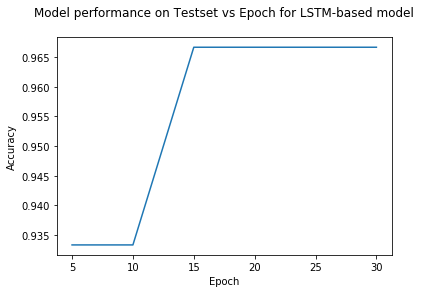

In [20]:
pfs = []
for i in list(range(5, 31, 5)):
    checkpoint = f"../models/lstm_{i}_checkpoint.pth"
    model.load_state_dict(torch.load(checkpoint))
    pfs.append(evaluate(model, X_test, Y_test))
    
# Plot the data
plt.plot(np.arange(5,31,5), pfs)
plt.title("Model performance on Testset vs Epoch for LSTM-based model\n")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# plt.savefig("plots/performance_over_epochs_plot.png")
plt.show()

### Test GRU-based model performance

#### Create model instance and load weights

In [21]:
from deepSRGM import DeepSRGM
model = DeepSRGM(rnn='gru').to(device)

/opt/anaconda3/envs/pipenv/lib/python3.7/site-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [22]:
model.load_state_dict(torch.load("../models/gru_30_checkpoint.pth"))

<All keys matched successfully>

#### Evaluate on Test Set

In [23]:
evaluate(model, X_test, Y_test, threshold=0.6, verbose=True)

Sample 1/30 classified as CORRECT
Sample 2/30 classified as CORRECT
Sample 3/30 classified as CORRECT
Sample 4/30 classified as CORRECT
Sample 5/30 classified as CORRECT
Sample 6/30 classified as CORRECT
Sample 7/30 classified as CORRECT
Sample 8/30 classified as INCORRECT
Sample 9/30 classified as CORRECT
Sample 10/30 classified as CORRECT
Sample 11/30 classified as CORRECT
Sample 12/30 classified as CORRECT
Sample 13/30 classified as CORRECT
Sample 14/30 classified as CORRECT
Sample 15/30 classified as CORRECT
Sample 16/30 classified as CORRECT
Sample 17/30 classified as CORRECT
Sample 18/30 classified as CORRECT
Sample 19/30 classified as CORRECT
Sample 20/30 classified as CORRECT
Sample 21/30 classified as CORRECT
Sample 22/30 classified as CORRECT
Sample 23/30 classified as CORRECT
Sample 24/30 classified as CORRECT
Sample 25/30 classified as CORRECT
Sample 26/30 classified as CORRECT
Sample 27/30 classified as CORRECT
Sample 28/30 classified as CORRECT
Sample 29/30 classified as 

0.9666666666666667

### Compare naive performances on training and test sets

In [24]:
# Check simple performance on train_set (individual random subsequence)
print("Training Data:")
evaluate_naive(model, X_train, Y_train)
print("\n\nTest Data:")
evaluate_naive(model, X_test, Y_test)

Training Data:
Accuracy on given data: 98.94%


Test Data:
Accuracy on given data: 82.60%


0.826

### Comparison of model performance on the test set over epochs

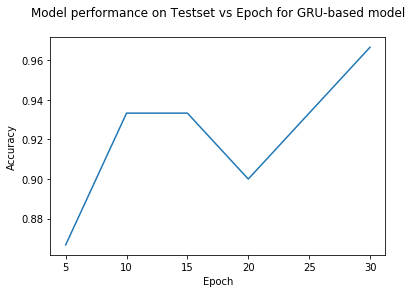

In [27]:
pfs = []
for i in list(range(5, 31, 5)):
    checkpoint = f"../models/gru_{i}_checkpoint.pth"
    model.load_state_dict(torch.load(checkpoint))
    pfs.append(evaluate(model, X_test, Y_test))
    
# Plot the data
plt.plot(np.arange(5,31,5), pfs)
plt.title("Model performance on Testset vs Epoch for GRU-based model\n")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# plt.savefig("plots/performance_over_epochs_plot.png")
plt.show()